In [110]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [111]:
df = pd.read_csv('data.csv')

In [112]:
df.head(n=2)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


In [113]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [114]:
df.head(n=2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


In [115]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [116]:
for item in strings:
    df[item] = df[item].str.lower().str.replace(" ", "_")
df.head(n=2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650


In [117]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print('****************************************')

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48
****************************************
model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914
****************************************
year
[2011 2012 2013 1992 1993]
28
****************************************
engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10
****************************************
engine_hp
[335. 300. 230. 320. 172.]
356
****************************************
engine_cylinders
[ 6.  4.  5.  8. 12.]
9
****************************************
transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5
****************************************
driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4
****************************************
number_of_doors
[ 2.  4.  3. nan]
3
****************************************
market_category
['factory_tuner

<AxesSubplot:xlabel='msrp', ylabel='Count'>

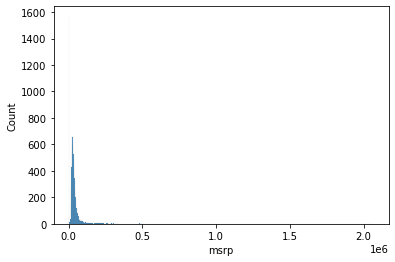

In [118]:
sns.histplot(df.msrp)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

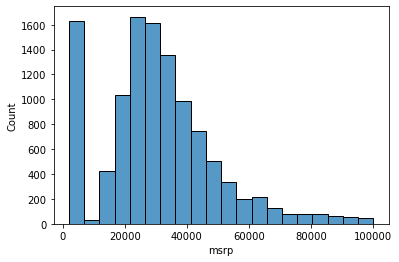

In [119]:
sns.histplot(df.msrp[df.msrp < 100000], bins=20)

In [120]:
price_logs = np.log1p(df.msrp)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

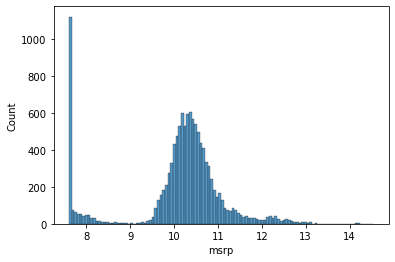

In [121]:
sns.histplot(price_logs)

In [122]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

Setting up the validation data

In [123]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - (n_val + n_test)

In [124]:
idx = np.arange(n)

In [125]:
np.random.seed(2)
np.random.shuffle(idx)
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [126]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train : n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val :]]

In [127]:
n, len(df_train), len(df_val), len(df_test)

(11914, 7150, 2382, 2382)

In [128]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

Select targets

In [129]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [130]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

Linear regression vector form

In [131]:
def dot(xi, w):
    n = len(xi)

    res = 0.0

    for j in range(n):
        res += xi[j] * w[j]

    return res

In [132]:
w0 = 7.17

def linear_regression(xi, w):
    return w0 + dot(xi, w)

In [133]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [134]:
y_log_pred = linear_regression(xi, w)
y_log_pred

12.312000000000001

In [135]:
y_exp_pred = np.expm1(y_log_pred)
y_exp_pred

222347.22211010658

In [136]:
np.log1p(y_exp_pred)

12.312000000000001

In [137]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x3 = [1, 454, 11, 86]

X = [x1 , x2 , x3]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  454,   11,   86]])

In [138]:
def linear_regression(X):
    return X.dot(w_new)

In [139]:
linear_regression(X)

array([12.38 , 13.552, 12.322])

Training a linear regression

In [140]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],
]
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [141]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [142]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [143]:
train_linear_regression(X, y)

(25844.754055766807, array([ -16.08906468, -199.47254894,   -1.22802883]))

Car price baseline model

In [144]:
df_train.dtypes[df_train.dtypes == "int64"].index

base = [
    "engine_hp",
    "engine_cylinders",
    "highway_mpg",
    "city_mpg",
    "popularity",
]

In [145]:
df_train[base] = df_train[base].fillna(0)
X_train = df_train[base].values
w0, w = train_linear_regression(X=X_train, y=y_train)

In [146]:
y_pred = w0 + X_train.dot(w)

In [147]:
def plot_target_pred(y_target, y_pred):
    sns.histplot(data=y_target, color='red', bins=60)
    sns.histplot(data=y_pred, bins=60)

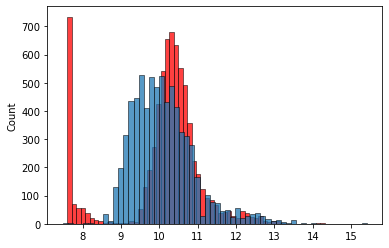

In [148]:
plot_target_pred(y_train, y_pred)

In [149]:
def rmse(y_train,y_pred):
    se = (y_train - y_pred)**2
    mse = se.mean()
    return np.sqrt(mse)

rmse(y_train, y_pred)

0.7554192603920132

Validating the model

In [150]:
def prepare_X(df):
    df_num = df[base].fillna(0)
    return df_num.values

In [151]:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.7616530991301591

In [152]:
def prepare_X(df):
    df = df.copy()
    df["age"] = 2017 - df["year"]
    features = base + ["age"]
    df_num = df[features].fillna(0)
    return df_num.values

Feature engineering

In [153]:
X_train = prepare_X(df_train)

In [154]:
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5172055461058328

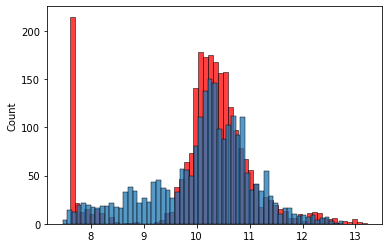

In [155]:
plot_target_pred(y_val, y_pred)

Categorical variables

In [156]:
def prepare_X(df):
    df = df.copy()

    df["age"] = 2017 - df["year"]
    features = base + ["age"]

    for v in [2, 3, 4]:
        door_attr = "num_doors_%s" % v
        df[door_attr] = (df["number_of_doors"] == v).astype("int")
        features.append(door_attr)

    df_num = df[features].fillna(0)
    return df_num.values

In [157]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)


0.5157995641503232

In [158]:
car_makes = list(df.make.value_counts().head().index)
car_makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [159]:
def prepare_X(df):
    df = df.copy()

    df["age"] = 2017 - df["year"]
    features = base + ["age"]

    for v in [2, 3, 4]:
        door_attr = "num_doors_%s" % v
        df[door_attr] = (df["number_of_doors"] == v).astype("int")
        features.append(door_attr)

    for v in car_makes:
        make_attr = "make_%s" % v
        df[make_attr] = (df["make"] == v).astype("int")
        features.append(make_attr)

    df_num = df[features].fillna(0)
    return df_num.values

In [160]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5076038849557535

In [161]:
categorical_variables = [
    "make",
    "engine_fuel_type",
    "transmission_type",
    "driven_wheels",
    "market_category",
    "vehicle_size",
    "vehicle_style",
]

In [162]:
categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [166]:
def prepare_X(df):
    df = df.copy()

    df["age"] = 2017 - df["year"]
    features = base + ["age"]

    for v in [2, 3, 4]:
        door_attr = "num_doors_%s" % v
        df[door_attr] = (df["number_of_doors"] == v).astype("int")
        features.append(door_attr)

    del df['number_of_doors']

    for c, values in categories.items():
        for v in values:
            attr = "%s_%s" % (c, v)
            df[attr] = (df[c] == v).astype("int")
            features.append(attr)
        del df[c]

    df_num = df[features].fillna(0)
    return df_num.values

In [170]:
# del df_train['number_of_doors']

X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

351.4984466414716

In [172]:
w0, w

(-8.149664796872362e+16,
 array([-1.11208069e+00, -1.34925793e+02, -3.24851000e+01, -9.87072274e+00,
        -1.49173928e-02, -2.06057282e+01, -1.87339232e+04, -1.89795664e+04,
        -1.88658770e+04,  3.54714625e+00, -2.67846985e+01, -4.89386241e+01,
        -1.47143273e+01, -7.62933126e+00, -1.03740423e+03, -8.84736252e+02,
        -9.80474847e+02, -9.69581926e+02, -1.36406044e+03,  7.86137678e+16,
         7.86137678e+16,  7.86137678e+16,  7.86137678e+16,  7.86137678e+16,
         2.88288017e+15,  2.88288017e+15,  2.88288017e+15,  2.88288017e+15,
        -8.41636885e+00, -1.11909079e+01, -8.76537776e+00, -1.80520374e+01,
        -5.37066804e+01, -3.53285736e+02, -3.63082905e+02, -3.52498049e+02,
        -4.85492239e-02,  5.44797374e-02,  1.78241160e-01,  3.41906701e-01,
        -1.64412078e-01]))

Regularization (make sure the weights don't go further)

In [181]:
def train_linear_regression_reg(X, y, r=0.01):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [198]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.45652199013108175

In [200]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)

    print(score, r,)

351.4984466414716 0.0
0.4565170339013851 1e-05
0.4565170681016663 0.0001
0.4565175087985475 0.001
0.45652199013108175 0.01
0.45656927630133964 0.1
0.45722043179949984 1


In [204]:
r = 0.00001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.4565170339013851

USing the model with regularization term r = 0.00001

In [220]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

X_full_train = prepare_X(df_full_train)

y_full_train = np.concatenate([y_train, y_val])

w0, w = train_linear_regression_reg(X_full_train, y_full_train)

In [256]:
X = prepare_X(df_test)
y_pred = w0 + X.dot(w)

rmse(y_test, y_pred)

0.4517787580641642

In [264]:
def predict(df):
    X = prepare_X(df)
    y_pred = w0 + X.dot(w)

    return y_pred[0]

Using the model

In [250]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [251]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [260]:
X_small = prepare_X(df_small)
X_small

array([[2.660e+02, 6.000e+00, 2.500e+01, 1.800e+01, 2.031e+03, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]])

In [255]:
y_small = np.array(y_test[20])
y_small

array(10.46313191)

In [265]:
y_log_pred = predict(df_small)

In [280]:
y_pred = np.expm1(y_log_pred)
y_pred

34980.54278811341

In [279]:
y_target = np.expm1(y_test[20])
y_target.round(2)

35000.0